## ライブラリのインポート

In [1]:
import numpy as np
#サイキットラーン　（メモリの節約のため、sklearnの中からLinearRegressionのみをインポートする
from sklearn.linear_model import LinearRegression as LR
# ボストンの住宅情報
from sklearn.datasets import load_boston
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## テスト用データの読み込み

In [2]:
boston = load_boston()
# ボストンの家賃のデータの各項目
## 1.  CRIM      町ごとの一人当たりの犯罪率
## 2.  ZN        宅地の比率が25,000平方フィートを超える敷地に区画されている。
## 3.  INDUS     町当たりの非小売業エーカーの割合
## 4.  CHAS      チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0）
## 5.  NOX       一酸化窒素濃度（1000万分の1）
## 6.  RM        1住戸あたりの平均部屋数
## 7.  AGE       1940年以前に建設された所有占有ユニットの年齢比率
## 8.  DIS       5つのボストンの雇用センターまでの加重距離
## 9.  RAD       ラジアルハイウェイへのアクセス可能性の指標
## 10.  TAX      10,000ドルあたりの税全額固定資産税率
## 11.  PTRATIO  生徒教師の比率
## 12.  B        町における黒人の割合
## 13.  LSTAT    人口当たり地位が低い率
## 14.  MEDV     1000ドルでの所有者居住住宅の中央値

# ボストンの家賃のデータを表形式で表示
df=pd.DataFrame(boston.data ,columns=boston.feature_names)
x=df
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# ボストンの家賃のデータを表形式で表示
df=pd.DataFrame(boston.target ,columns=['TARGET'])
y=df
y.head()

,TARGET
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## 訓練データと検証データに分割する

In [4]:
# 訓練データと検証データの分割
#random_stateは再現性を確保するために指定する
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=1) 

## 学習する

In [5]:
#線回帰モデルの定義
model = LR()
# モデルの学習
model.fit(X_train ,y_train)

LinearRegression()

In [6]:
# 学習の結果、求まったモデルの結果
a = model.coef_               ##傾き
b = model.intercept_          ##切片
print('a',a)
print('b',b)

a [[-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
  -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
   2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
  -5.04008320e-01]]
b [33.79211251]


In [7]:
# 検証 <-訓練データ 
model.score(X_train ,y_train)

0.7468316520140625

## 誤差の確認

In [8]:
# 入力データに対して
y_hat=model.predict(x)
err=y_hat - y
print(err)

        TARGET
0     5.423688
1     3.075898
2    -4.745526
3    -5.360953
4    -8.788429
..         ...
501   1.078388
502   1.780291
503   3.518489
504   3.990607
505  10.468980

[506 rows x 1 columns]


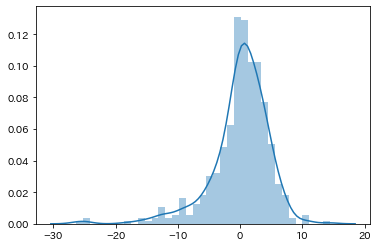

In [9]:
%matplotlib inline
import seaborn as sns

# 分布の確認 →　正規分布に従っているなら重回帰分析は可能
sns.distplot(err)

## 検証データを使って予測値の検証

In [10]:
# 検証 <-検証データ
# (検証データと値が近いなら信用できる。どこまでの差異を
#  近いとするかはそれぞれ判断する必要がある。)
model.score(X_test,y_test)

0.7209056672661767

# 外れ値除去
（イレギュラーな値を見つけて、モデルを求める際の入力データから除く）

正規分布に従っていることが、３σ法で除去できる条件である。

In [11]:
# x と y の値をひとつの変数に格納する
df2 = x
df2['TARGET'] = y
df_bk=df2.copy()
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# 標準偏差(Standard deviation)
sigma=df2.std()
sigma

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
TARGET       9.197104
dtype: float64

In [13]:
# 平均
mean = df2.mean()
mean

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
TARGET      22.532806
dtype: float64

### 入力データを基準に外れ値を除去する

In [14]:
df_tmp=df2
# ヘッダの項目名を変数に格納する。（ループがやりやすい）
cols=df_tmp.columns
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

In [15]:
print('元のデータセット',len(df_bk))

元のデータセット 506


In [16]:
for col in cols:
    # ３σ法の上下限値を設定する
    low=mean[col]-3*sigma[col]
    high=mean[col]+3*sigma[col]
    # 条件で絞込
    df_tmp=df_tmp[(df_tmp[col]>low) & (df_tmp[col]<high)]
    print('col[',col,']',len(df_tmp))
    
df2=df_tmp

col[ CRIM ] 498
col[ ZN ] 484
col[ INDUS ] 484
col[ CHAS ] 450
col[ NOX ] 450
col[ RM ] 443
col[ AGE ] 443
col[ DIS ] 439
col[ RAD ] 439
col[ TAX ] 439
col[ PTRATIO ] 439
col[ B ] 417
col[ LSTAT ] 415
col[ TARGET ] 415


In [17]:
print('外れ値を除去後のデータセット',len(df2))

外れ値を除去後のデータセット 415


**２割近く減っているが、どれぐらい減っても問題がないかは、判断する必要がある**

In [18]:
df_bk.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.0,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.0,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.0,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.0,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.0,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.0,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.0,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


In [20]:
# 入力データ格納
x2 = df2.iloc[:,:-1]
x2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
# 出力データ格納
y2 = df2.iloc[:,-1:]
y2.head()

,TARGET
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [24]:
# 訓練データと検証データの分割
# random_stateは再現性を確保するために指定する
X2_train,X2_test,y2_train,y2_test=train_test_split(x2, y2, test_size=0.4, random_state=2) 

## 学習する

In [25]:
#線回帰モデルの定義
model2 = LR()
# モデルの学習
model2.fit(X2_train ,y2_train)

LinearRegression()

In [26]:
# 学習の結果、求まったモデルの結果
a = model.coef_               ##傾き
b = model.intercept_          ##切片
print('a',a)
print('b',b)

a [[-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
  -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
   2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
  -5.04008320e-01]]
b [33.79211251]


In [27]:
# 検証 <-訓練データ 
model2.score(X2_train ,y2_train)

0.7854906904646115

## 検証データを使って予測値の検証

In [28]:
# 検証 <-検証データ
model2.score(X2_test,y2_test)

0.6794649493430359

### 誤差の確認

In [29]:
y_hat2=model2.predict(x2)
err2=y_hat2 - y2
print(err2)

       TARGET
0    4.605067
1    2.723180
2   -4.054176
3   -4.249626
4   -7.361842
..        ...
501  1.674732
502  1.131862
503  2.978563
504  3.447384
505  9.336703

[415 rows x 1 columns]


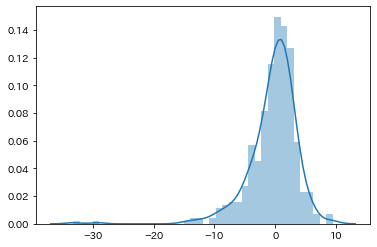

In [30]:
# 分布の確認 →　正規分布に従っているなら重回帰分析は可能
sns.distplot(err2)